# 'data/structral/airport/train.in'

In [1]:
N = [90, 80, 70, 60, 50, 40, 30, 20, 10]
auc_sfdp_default = [0.90, 0.92, 0.93, 0.94, 0.94, 0.94, 0.95, 0.95, 0.95]
auc_NMF = [0.87, 0.92, 0.93, 0.95, 0.96, 0.96, 0.96, 0.97, 0.97]
auc_SVDS = [0.68, 0.77, 0.83, 0.87, 0.90, 0.92, 0.93, 0.95, 0.95]

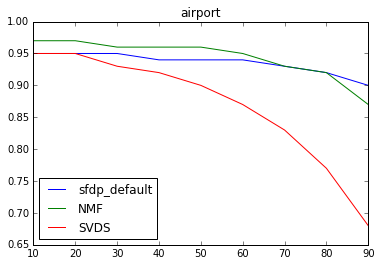

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(N, auc_sfdp_default, label='sfdp_default')
plt.plot(N, auc_NMF, label='NMF')
plt.plot(N, auc_SVDS, label='SVDS')

plt.legend(loc=3)
plt.title('airport')
plt.show()

# data/structral/EuroSiS/train.in

In [7]:
N = [90, 80, 70, 60, 50, 40, 30, 20, 10]
auc_sfdp_default = [0.68, 0.78, 0.83, 0.86, 0.86, 0.88, 0.89, 0.90, 0.91]
auc_NMF = [0.64, 0.77, 0.83, 0.87, 0.88, 0.89, 0.91, 0.91, 0.92]
auc_SVDS = [0.53, 0.64, 0.73, 0.78, 0.81, 0.83, 0.86, 0.88, 0.88]

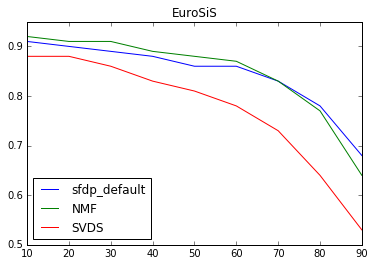

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(N, auc_sfdp_default, label='sfdp_default')
plt.plot(N, auc_NMF, label='NMF')
plt.plot(N, auc_SVDS, label='SVDS')

plt.legend(loc=3)
plt.title('EuroSiS')
plt.show()

# data/structral/PowerGrid/train.in

In [159]:
def extract_auc(line, name, auc_list, N):
    index = line.find(name)
    if index >= 0:
        l = len(name)
        auc = float(line[index+l: index+l+4])
        
        index = line.find('(+/- ')
        l = len('(+/- ')
        auc_var = float(line[index+l: index+l+4])
        
        auc_list[N/10] = [auc, auc_var]

def extract_data(logs_file, is_line=False):
    auc = {
        "auc_sfdp_default": [None for i in range(10)],
        "auc_NMF_10": [None for i in range(10)],
        "auc_NMF_30": [None for i in range(10)],
        "auc_SVDS_10": [None for i in range(10)],
        "auc_SVDS_30": [None for i in range(10)],
        "auc_PA": [None for i in range(10)],
        "auc_CN": [None for i in range(10)],
        "auc_AA": [None for i in range(10)],
        "auc_directed": [None for i in range(10)],
        "auc_bipartite": [None for i in range(10)],
    }
    N = None
    if not is_line:
        f = open(logs_file, 'r')
    else:
        f = [logs_file]
    for line in f:
        if 'N: ' in line:
            index = line.find('N: ')
            N = int(line[index+3: index+5])
        extract_auc(line, 'NMF-10 : ', auc["auc_NMF_10"], N)
        extract_auc(line, 'NMF-30 : ', auc["auc_NMF_30"], N)
        extract_auc(line, 'svds-10 : ', auc["auc_SVDS_10"], N)
        extract_auc(line, 'svds-30 : ', auc["auc_SVDS_30"], N)
        extract_auc(line, 'PA : ', auc["auc_PA"], N)
        extract_auc(line, 'CN : ', auc["auc_CN"], N)
        extract_auc(line, 'Adamic-Adar : ', auc["auc_AA"], N)
        extract_auc(line, 'sfdp-default : ', auc["auc_sfdp_default"], N)
        extract_auc(line, 'sfdp-directed : ', auc["auc_directed"], N)
        extract_auc(line, 'sfdp-bipartite : ', auc["auc_bipartite"], N)
    return auc

In [99]:
auc_power_grid = extract_data('PowerGrid_logs.txt')

In [111]:
def print_latex_line(auc):
    return ' ' + str(auc[0]) + "$\pm$" + str(auc[1]) + ' '

def print_latex_table(k, auc):
    # SFDP & PA & CN & AA & NMF-10 & NMF-30 & SVDS-10  & SVDS-30
    line = ''
    line += print_latex_line(auc["auc_sfdp_default"][k/10]) + '&'
    line += print_latex_line(auc["auc_PA"][k/10]) + '&'
    line += print_latex_line(auc["auc_CN"][k/10]) + '&'
    line += print_latex_line(auc["auc_AA"][k/10]) + '&'
    line += print_latex_line(auc["auc_NMF_10"][k/10]) + '&'
    line += print_latex_line(auc["auc_NMF_30"][k/10]) + '&'
    line += print_latex_line(auc["auc_SVDS_10"][k/10]) + '&'
    line += print_latex_line(auc["auc_SVDS_30"][k/10]) + '\\\\  \hline'
    print line

def print_slice(k, auc):
    print 'NMF-10 : ', auc["auc_NMF_10"][k/10]
    print 'NMF-30 : ', auc["auc_NMF_30"][k/10]
    print 'svds-10 : ', auc["auc_SVDS_10"][k/10]
    print 'svds-30 : ', auc["auc_SVDS_30"][k/10]
    print 'PA : ', auc["auc_PA"][k/10]
    print 'CN : ', auc["auc_CN"][k/10]
    print 'Adamic-Adar : ', auc["auc_AA"][k/10]
    print 'sfdp-default : ', auc["auc_sfdp_default"][k/10]

In [110]:
print_slice(10, auc_power_grid)

NMF-10 :  [0.57, 0.05]
NMF-30 :  [0.72, 0.04]
svds-10 :  [0.51, 0.08]
svds-30 :  [0.7, 0.04]
PA :  [0.44, 0.03]
CN :  [0.59, 0.01]
Adamic-Adar :  [0.59, 0.01]
sfdp-default :  [0.83, 0.02]


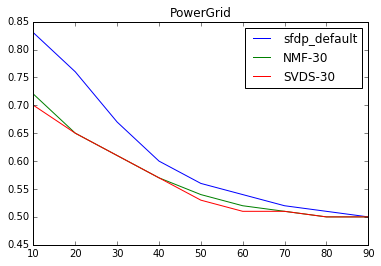

In [60]:
def get_score(auc):
    return [x[0] for x in auc if x]

%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_power_grid["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_power_grid["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_power_grid["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=1)
plt.title('PowerGrid')
plt.show()

# data/structral/euroroad/train.in

In [115]:
auc_euroroad = extract_data('Euroroad_logs.txt')

In [70]:
print_slice(10, auc_euroroad)

NMF-10 :  [0.66, 0.05]
NMF-30 :  [0.64, 0.05]
svds-10 :  [0.64, 0.08]
svds-30 :  [0.61, 0.06]
PA :  [0.33, 0.05]
CN :  [0.52, 0.02]
Adamic-Adar :  [0.52, 0.02]
sfdp-default :  [0.74, 0.07]


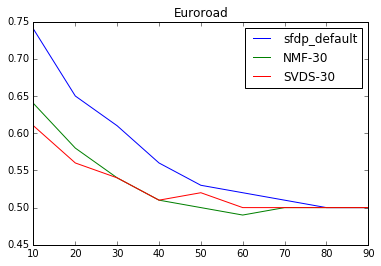

In [121]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_euroroad["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_euroroad["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_euroroad["auc_SVDS_30"]), label='SVDS-30')


plt.legend(loc=1)
plt.title('Euroroad')
plt.show()

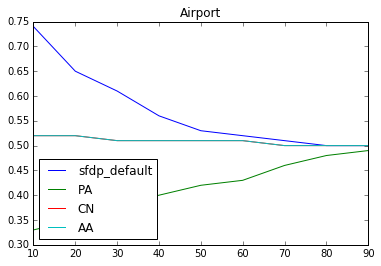

In [90]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_euroroad["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_euroroad["auc_PA"]), label='PA')
plt.plot(N, get_score(auc_euroroad["auc_CN"]), label='CN')
plt.plot(N, get_score(auc_euroroad["auc_AA"]), label='AA')

plt.legend(loc=3)
plt.title('Airport')
plt.show()

# data/structral/airport/train.in

In [114]:
auc_airport = extract_data('Airport_logs.txt')

In [93]:
print_slice(30, auc_airport)

NMF-10 :  [0.96, 0.0]
NMF-30 :  [0.97, 0.0]
svds-10 :  [0.96, 0.0]
svds-30 :  [0.93, 0.01]
PA :  [0.94, 0.0]
CN :  [0.96, 0.0]
Adamic-Adar :  [0.96, 0.0]
sfdp-default :  [0.94, 0.0]


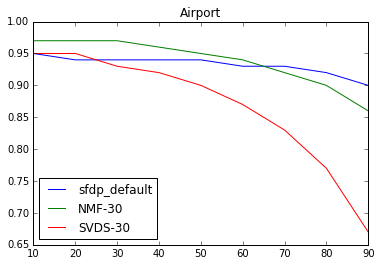

In [141]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_airport["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_airport["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_airport["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=3)
plt.title('Airport')
plt.show()

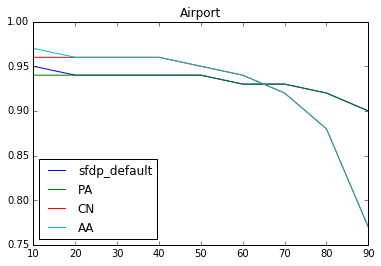

In [91]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_airport["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_airport["auc_PA"]), label='PA')
plt.plot(N, get_score(auc_airport["auc_CN"]), label='CN')
plt.plot(N, get_score(auc_airport["auc_AA"]), label='AA')

plt.legend(loc=3)
plt.title('Airport')
plt.show()

# Facebook

In [171]:
auc_facebook = extract_data('facebook_logs.txt')

In [172]:
print_slice(30, auc_facebook)

NMF-10 :  [0.91, 0.0]
NMF-30 :  [0.93, 0.0]
svds-10 :  [0.91, 0.0]
svds-30 :  [0.92, 0.0]
PA :  [0.88, 0.0]
CN :  [0.91, 0.0]
Adamic-Adar :  [0.91, 0.0]
sfdp-default :  [0.93, 0.0]


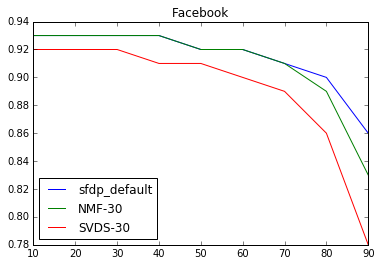

In [173]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_facebook["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_facebook["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_facebook["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=3)
plt.title('Facebook')
plt.show()

# Reactome

In [174]:
auc_reactome = extract_data('reactome_logs.txt')

In [175]:
print_slice(30, auc_reactome)

NMF-10 :  [0.95, 0.0]
NMF-30 :  [0.98, 0.0]
svds-10 :  [0.95, 0.0]
svds-30 :  [0.97, 0.0]
PA :  [0.9, 0.0]
CN :  [0.98, 0.0]
Adamic-Adar :  [0.99, 0.0]
sfdp-default :  [0.98, 0.0]


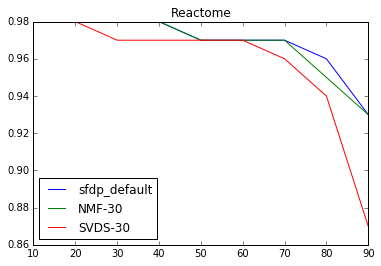

In [177]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_reactome["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_reactome["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_reactome["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=3)
plt.title('Reactome')
plt.show()

# ca-cit-HepTh-logs.txt

In [185]:
auc_cacit = extract_data('ca-cit-HepTh-logs.txt')

In [186]:
print_slice(30, auc_cacit)

NMF-10 :  [0.94, 0.0]
NMF-30 :  [0.97, 0.0]
svds-10 :  [0.95, 0.0]
svds-30 :  [0.97, 0.0]
PA :  [0.91, 0.0]
CN :  [0.98, 0.0]
Adamic-Adar :  [0.99, 0.0]
sfdp-default :  [0.93, 0.0]


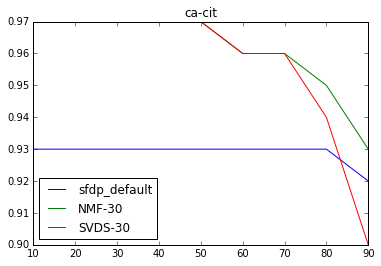

In [187]:
%matplotlib inline

import matplotlib.pyplot as plt

N = range(10, 100, 10)

plt.plot(N, get_score(auc_cacit["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_cacit["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_cacit["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=3)
plt.title('ca-cit')
plt.show()

# Latex

In [117]:
print_latex_table(10, auc_power_grid)
print_latex_table(30, auc_airport)
print_latex_table(10, auc_euroroad)

 0.83$\pm$0.02 & 0.44$\pm$0.03 & 0.59$\pm$0.01 & 0.59$\pm$0.01 & 0.57$\pm$0.05 & 0.72$\pm$0.04 & 0.51$\pm$0.08 & 0.7$\pm$0.04 \\  \hline
 0.94$\pm$0.0 & 0.94$\pm$0.0 & 0.96$\pm$0.0 & 0.96$\pm$0.0 & 0.96$\pm$0.0 & 0.97$\pm$0.0 & 0.96$\pm$0.0 & 0.93$\pm$0.01 \\  \hline
 0.74$\pm$0.07 & 0.33$\pm$0.05 & 0.52$\pm$0.02 & 0.52$\pm$0.02 & 0.66$\pm$0.05 & 0.64$\pm$0.05 & 0.64$\pm$0.08 & 0.61$\pm$0.06 \\  \hline


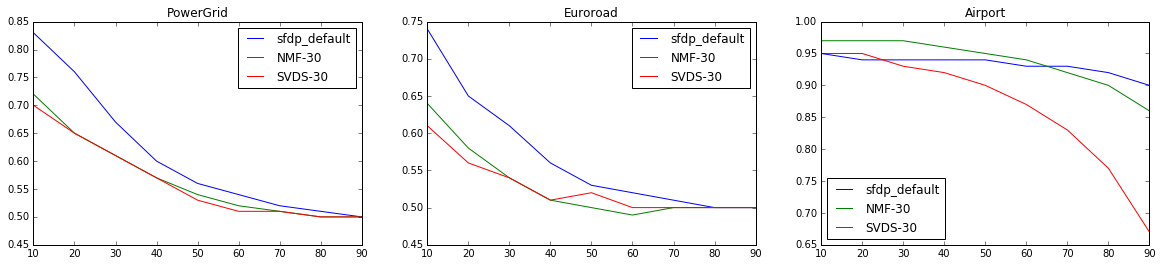

In [138]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,3)
plt.plot(N, get_score(auc_airport["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_airport["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_airport["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=3)
plt.title('Airport')

plt.subplot(1,3,2)
plt.plot(N, get_score(auc_euroroad["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_euroroad["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_euroroad["auc_SVDS_30"]), label='SVDS-30')
plt.legend(loc=1)
plt.title('Euroroad')

plt.subplot(1,3,1)
plt.plot(N, get_score(auc_power_grid["auc_sfdp_default"]), label='sfdp_default')
plt.plot(N, get_score(auc_power_grid["auc_NMF_30"]), label='NMF-30')
plt.plot(N, get_score(auc_power_grid["auc_SVDS_30"]), label='SVDS-30')

plt.legend(loc=1)
plt.title('PowerGrid')
plt.show()

# Directed

In [153]:

def print_latex_table_directed(k, auc):
    # Di-SFDP & SFDP & NMF-10 & NMF-30 & SVDS-10  & SVDS-30
    line = ''
    line += print_latex_line(auc["auc_directed"][k/10]) + '&'
    line += print_latex_line(auc["auc_sfdp_default"][k/10]) + '&'
    line += print_latex_line(auc["auc_NMF_10"][k/10]) + '&'
    line += print_latex_line(auc["auc_NMF_30"][k/10]) + '&'
    line += print_latex_line(auc["auc_SVDS_10"][k/10]) + '&'
    line += print_latex_line(auc["auc_SVDS_30"][k/10]) + '\\\\  \hline'
    print line

In [156]:
line = """file:data/directed/cit-HepTh/train.in N: 30 k: 1 gap:0 verbose:False directed:True bipartite:False max_iter:4
NMF-10 : 0.81 (+/- 0.00)
svds-30 : 0.82 (+/- 0.00)
PA : 0.54 (+/- 0.00)
CN : 0.51 (+/- 0.00)
Adamic-Adar : 0.51 (+/- 0.00)
sfdp-directed : 0.83 (+/- 0.00)
NMF-30 : 0.82 (+/- 0.00)
svds-10 : 0.81 (+/- 0.00)
sfdp-default : 0.53 (+/- 0.00)"""

line_g = """file:data/directed/ego-gplus/train.in N: 30 k: 1 gap:0 verbose:False directed:True bipartite:False max_iter:4
NMF-10 : 0.74 (+/- 0.00)
svds-30 : 0.66 (+/- 0.00)
PA : 0.52 (+/- 0.00)
CN : 0.51 (+/- 0.00)
Adamic-Adar : 0.51 (+/- 0.00)
sfdp-directed : 0.81 (+/- 0.00)
NMF-30 : 0.69 (+/- 0.00)
svds-10 : 0.71 (+/- 0.00)
sfdp-default : 0.52 (+/- 0.00)"""

line_t = """file:data/directed/ego-twitter/train.in N: 30 k: 1 gap:0 verbose:False directed:True bipartite:False max_iter:4
NMF-10 : 0.68 (+/- 0.00)
svds-30 : 0.67 (+/- 0.00)
PA : 0.51 (+/- 0.00)
CN : 0.51 (+/- 0.00)
Adamic-Adar : 0.51 (+/- 0.00)
sfdp-directed : 0.77 (+/- 0.00)
NMF-30 : 0.67 (+/- 0.00)
svds-10 : 0.67 (+/- 0.00)
sfdp-default : 0.50 (+/- 0.00)"""

auc_cit_HepTh = extract_data(line, True)
auc_google = extract_data(line_g, True)
auc_twitter = extract_data(line_t, True)

In [157]:
print_latex_table_directed(30, auc_cit_HepTh)
print_latex_table_directed(30, auc_google)
print_latex_table_directed(30, auc_twitter)

 0.83$\pm$0.0 & 0.53$\pm$0.0 & 0.81$\pm$0.0 & 0.82$\pm$0.0 & 0.81$\pm$0.0 & 0.82$\pm$0.0 \\  \hline
 0.81$\pm$0.0 & 0.52$\pm$0.0 & 0.74$\pm$0.0 & 0.69$\pm$0.0 & 0.71$\pm$0.0 & 0.66$\pm$0.0 \\  \hline
 0.77$\pm$0.0 & 0.5$\pm$0.0 & 0.68$\pm$0.0 & 0.67$\pm$0.0 & 0.67$\pm$0.0 & 0.67$\pm$0.0 \\  \hline


# Bipartite

In [166]:
def print_latex_table_biparite(k, auc):
    # Bi-SFDP & SFDP & PA & CN & AA & NMF-10 & NMF-30 & SVDS-10  & SVDS-30
    line = ''
    line += print_latex_line(auc["auc_bipartite"][k/10]) + '&'
    line += print_latex_line(auc["auc_sfdp_default"][k/10]) + '&'
    line += print_latex_line(auc["auc_PA"][k/10]) + '&'
    line += print_latex_line(auc["auc_NMF_10"][k/10]) + '&'
    line += print_latex_line(auc["auc_NMF_30"][k/10]) + '&'
    line += print_latex_line(auc["auc_SVDS_10"][k/10]) + '&'
    line += print_latex_line(auc["auc_SVDS_30"][k/10]) + '\\\\  \hline'
    print line

In [160]:
line_condmat = """file:data/bipartite/condmat/train.in N: 30 k: 1 gap:0 verbose:False directed:False bipartite:True max_iter:0
NMF-10 : 0.59 (+/- 0.00)
svds-30 : 0.64 (+/- 0.00)
PA : 0.57 (+/- 0.00)
CN : 0.50 (+/- 0.00)
Adamic-Adar : 0.50 (+/- 0.00)
NMF-30 : 0.61 (+/- 0.00)
svds-10 : 0.59 (+/- 0.00)
sfdp-bipartite : 0.60 (+/- 0.00)
sfdp-default : 0.70 (+/- 0.00)
"""

line_frwiki = """file:data/bipartite/frwikinews/train.in N: 30 k: 1 gap:0 verbose:False directed:False bipartite:True max_iter:0
NMF-10 : 0.72 (+/- 0.00)
svds-30 : 0.61 (+/- 0.00)
PA : 0.82 (+/- 0.00)
CN : 0.50 (+/- 0.00)
Adamic-Adar : 0.50 (+/- 0.00)
NMF-30 : 0.60 (+/- 0.00)
svds-10 : 0.75 (+/- 0.00)
sfdp-bipartite : 0.81 (+/- 0.00)
sfdp-default : 0.74 (+/- 0.00)"""

line_movielens = """file:data/bipartite/movielens/train.in N: 30 k: 1 gap:0 verbose:False directed:False bipartite:True max_iter:0
NMF-10 : 0.92 (+/- 0.00)
svds-30 : 0.94 (+/- 0.00)
PA : 0.90 (+/- 0.00)
CN : 0.50 (+/- 0.00)
Adamic-Adar : 0.50 (+/- 0.00)
NMF-30 : 0.94 (+/- 0.00)
svds-10 : 0.93 (+/- 0.00)
sfdp-bipartite : 0.89 (+/- 0.00)
sfdp-default : 0.84 (+/- 0.00)"""

auc_condmat = extract_data(line_condmat, True)
auc_frwiki = extract_data(line_frwiki, True)
auc_movielens = extract_data(line_movielens, True)

In [167]:
print_latex_table_biparite(30, auc_condmat)
print_latex_table_biparite(30, auc_frwiki)
print_latex_table_biparite(30, auc_movielens)

 0.6$\pm$0.0 & 0.7$\pm$0.0 & 0.57$\pm$0.0 & 0.59$\pm$0.0 & 0.61$\pm$0.0 & 0.59$\pm$0.0 & 0.64$\pm$0.0 \\  \hline
 0.81$\pm$0.0 & 0.74$\pm$0.0 & 0.82$\pm$0.0 & 0.72$\pm$0.0 & 0.6$\pm$0.0 & 0.75$\pm$0.0 & 0.61$\pm$0.0 \\  \hline
 0.89$\pm$0.0 & 0.84$\pm$0.0 & 0.9$\pm$0.0 & 0.92$\pm$0.0 & 0.94$\pm$0.0 & 0.93$\pm$0.0 & 0.94$\pm$0.0 \\  \hline
